In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns
%matplotlib inline

## Whole Sale Customer Dataset

## There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. 

## Our aim is to make clusters from this data that can segment similar clients together.

In [3]:
data=pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.Region.unique()

array([3, 1, 2], dtype=int64)

In [5]:
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler, RobustScaler
data_scaled = normalize(data)

# scaler=RobustScaler()
# data_scaled= scaler.fit_transform(data)


data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [6]:
data_scaled.max()

Channel             0.001553
Region              0.004660
Fresh               0.999391
Milk                0.926102
Grocery             0.976789
Frozen              0.944218
Detergents_Paper    0.903593
Delicassen          0.642610
dtype: float64

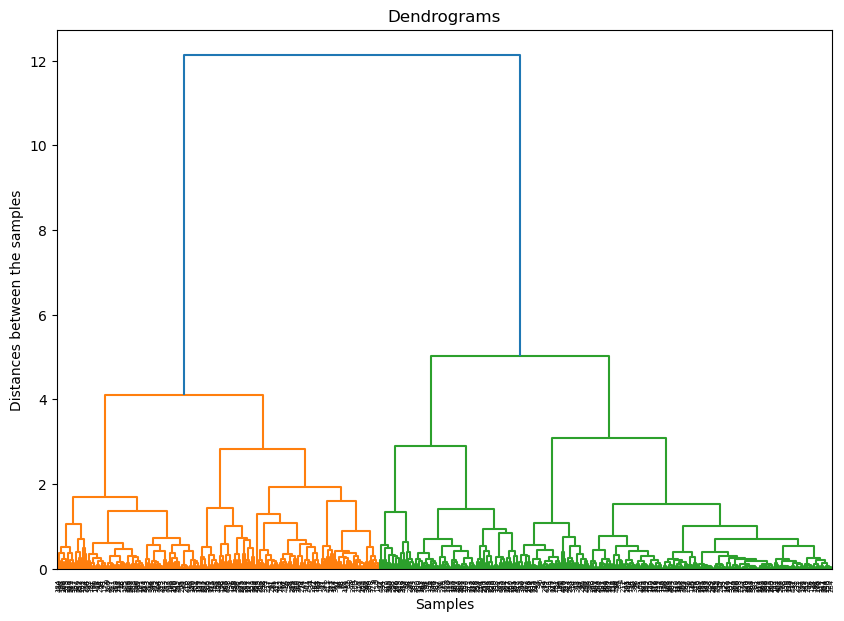

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.xlabel('Samples')
plt.ylabel('Distances between the samples')



dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

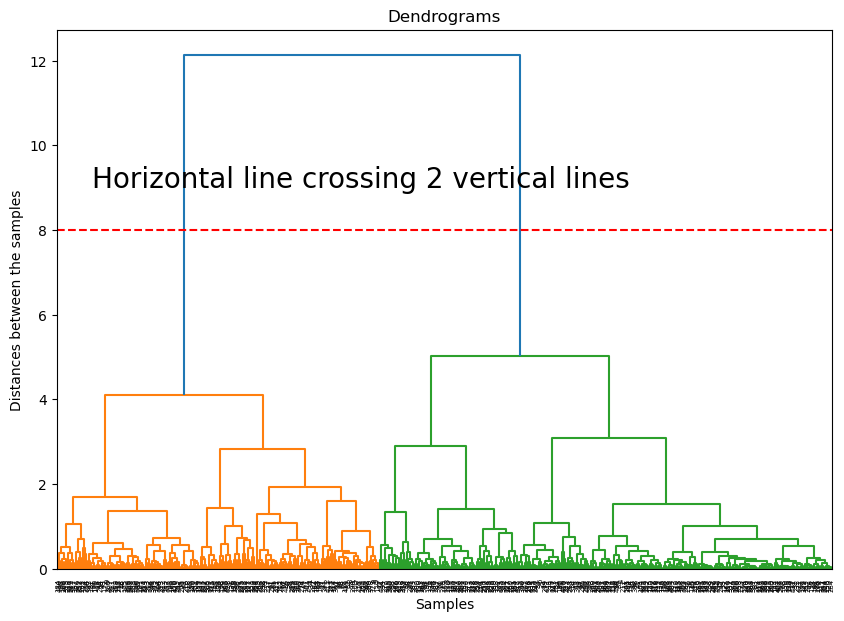

In [11]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.xlabel('Samples')
plt.ylabel('Distances between the samples')

dend = shc.dendrogram(shc.linkage(data_scaled, method=''))

plt.axhline(y=8, color='r', linestyle='--')

plt.text(x=200,y=9,s='Horizontal line crossing 2 vertical lines',fontsize=20)

plt.show()ward

# Build the Model

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(data_scaled)

cluster.fit_predict(data_scaled)
# cluster.labels_

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

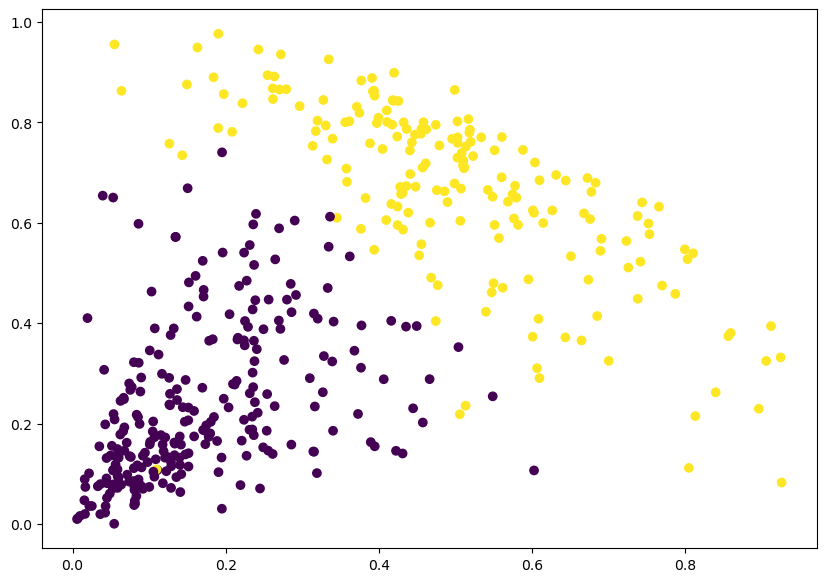

In [18]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

# DBSCAN

In [43]:
X = StandardScaler().fit_transform(data)

In [51]:
outlier_count = []
outlier_percentage = []

for epsilon in np.linspace(0.1,3,50):
    db = DBSCAN(eps=epsilon,min_samples=8)
    db.fit(X)
    # when label == -1, this means that customer is not in any cluster
    outliers = np.sum(db.labels_==-1)
    outlier_count.append(outliers)
    outlier_percentage.append(100*outliers/len(data))

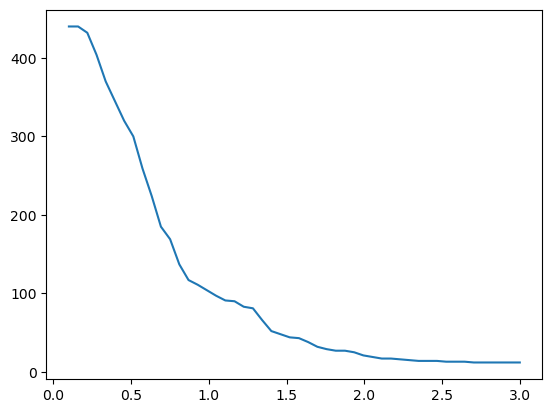

In [52]:
plt.plot(np.linspace(0.1,3,50),outlier_count)

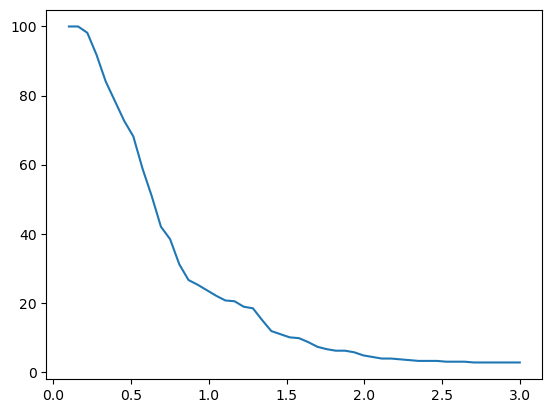

In [53]:
plt.plot(np.linspace(0.1,3,50),outlier_percentage)

In [55]:
final_model = DBSCAN(eps=1.5,min_samples=8)
final_model.fit(X)

DBSCAN(eps=1.5, min_samples=8)

In [56]:
final_model.labels_


array([ 0,  0, -1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0, -1,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1, -1,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0, -1,  1,  1,  0,  0,  0, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0, -1,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,  1,  0,  0, -1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1, -1,  1, -1,  1,  1,
        1,  1,  0,  1,  1

In [57]:
labels = final_model.labels_
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{-1: 45, 0: 118, 1: 277}

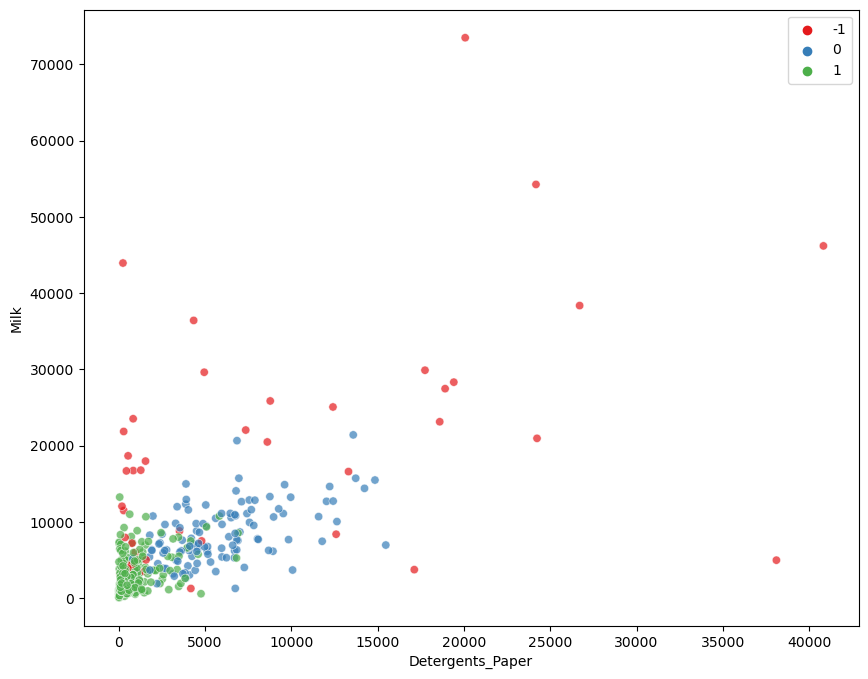

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x='Detergents_Paper',y='Milk',hue=final_model.labels_,palette='Set1',alpha=0.7);

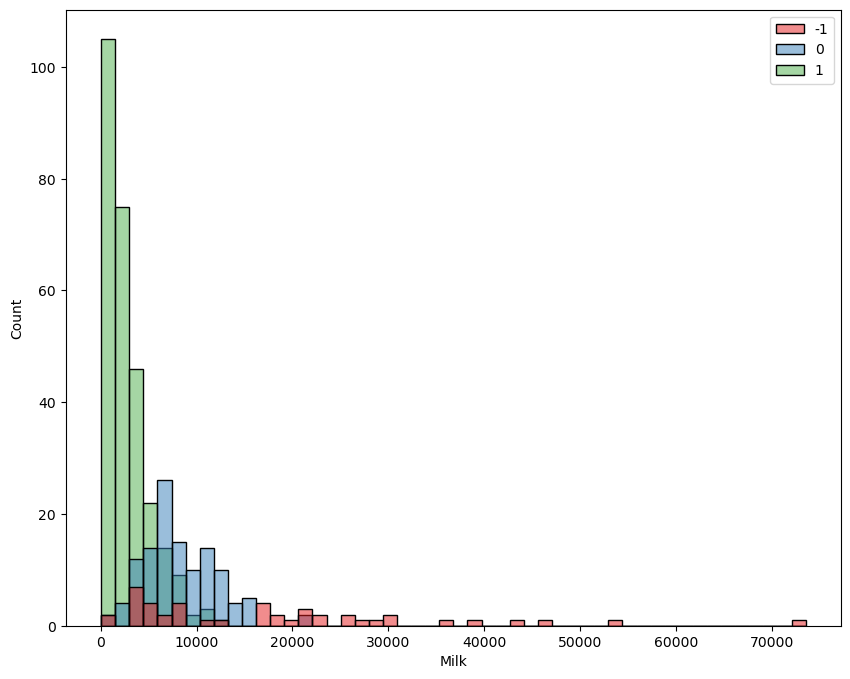

In [61]:
plt.figure(figsize=(10,8))
sns.histplot(data=data,x='Milk',hue=final_model.labels_,palette='Set1');

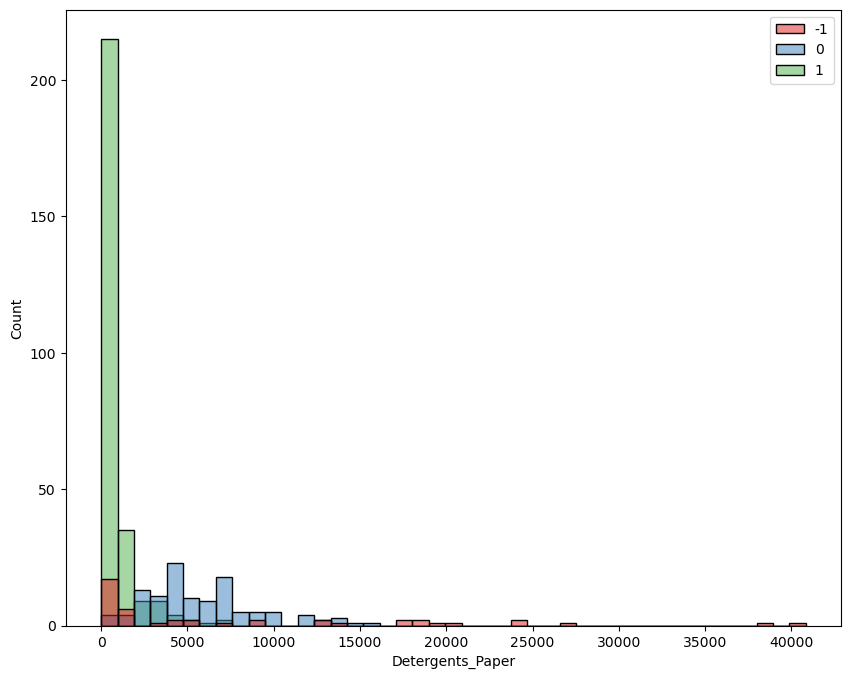

In [63]:
plt.figure(figsize=(10,8))
sns.histplot(data=data,x='Detergents_Paper',hue=final_model.labels_,palette='Set1');

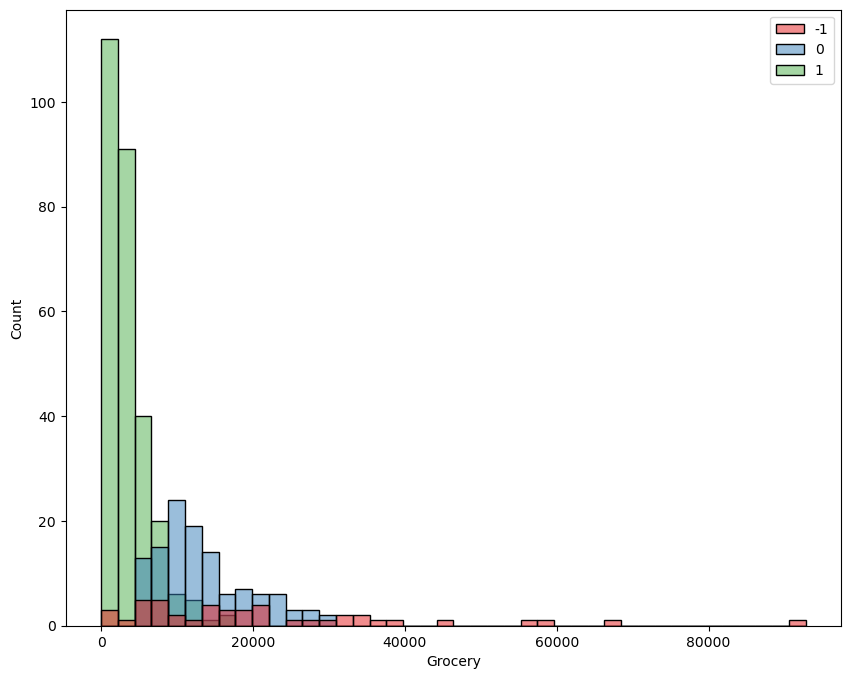

In [64]:
plt.figure(figsize=(10,8))
sns.histplot(data=data,x='Grocery',hue=final_model.labels_,palette='Set1');

In [67]:
data['Labels'] = final_model.labels_
# mean of each feature, groupby 'Labels'
data.groupby(['Labels']).mean().drop(['Channel','Region'],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,23741.577778,18027.422222,21434.977778,8210.000000,8150.266667,5068.822222
0,8110.847458,8238.576271,13303.983051,1416.881356,5831.059322,1336.000000
1,11749.747292,2768.848375,3480.570397,2942.267148,769.061372,1029.595668


In [68]:
# number of customers per label
dict(zip(unique, counts))


{-1: 45, 0: 118, 1: 277}

In [69]:
277/len(data)


0.6295454545454545

In [70]:
118/len(data)

0.2681818181818182

In [71]:
45/len(data)

0.10227272727272728